## Linear Regression with Normal equation

In [3]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거
warnings.filterwarnings(action='ignore')

In [4]:
from sklearn import datasets
X_data, y_data = datasets.fetch_openml('boston', return_X_y=True)

In [7]:
X = X_data.values
y = y_data.values
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [8]:
from sklearn.linear_model import LinearRegression
lr_ne = LinearRegression(fit_intercept=True)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [10]:
lr_ne.fit(X_train, y_train)

LinearRegression()

In [13]:
lr_ne.intercept_ , lr_ne.coef_
# intercept => 상수항
# coef => x 각각에 대한 w 값들

(33.33497575563571,
 array([-1.28749718e-01,  3.78232228e-02,  5.82109233e-02,  3.23866812e+00,
        -1.61698120e+01,  3.90205116e+00, -1.28507825e-02, -1.42222430e+00,
         2.34853915e-01, -8.21331947e-03, -9.28722459e-01,  1.17695921e-02,
        -5.47566338e-01]))

In [16]:
y_hat = lr_ne.predict(X_test)
y_true = y_test

In [17]:
y_hat

array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ,
       23.16471591, 17.31011035, 14.07736367, 23.01064388, 20.54223482,
       24.91632351, 18.41098052, -6.52079687, 21.83372604, 19.14903064,
       26.0587322 , 20.30232625,  5.74943567, 40.33137811, 17.45791446,
       27.47486665, 30.2170757 , 10.80555625, 23.87721728, 17.99492211,
       16.02608791, 23.268288  , 14.36825207, 22.38116971, 19.3092068 ,
       22.17284576, 25.05925441, 25.13780726, 18.46730198, 16.60405712,
       17.46564046, 30.71367733, 20.05106788, 23.9897768 , 24.94322408,
       13.97945355, 31.64706967, 42.48057206, 17.70042814, 26.92507869,
       17.15897719, 13.68918087, 26.14924245, 20.2782306 , 29.99003492,
       21.21260347, 34.03649185, 15.41837553, 25.95781061, 39.13897274,
       22.96118424, 18.80310558, 33.07865362, 24.74384155, 12.83640958,
       22.41963398, 30.64804979, 31.59567111, 16.34088197, 20.9504304 ,
       16.70145875, 20.23215646, 26.1437865 , 31.12160889, 11.89

In [20]:
rmse = np.sqrt(sum((y_hat - y_true)**2) / len(y_true))
rmse

4.552364598463059

In [25]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
np.sqrt(mse)

4.55236459846306

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

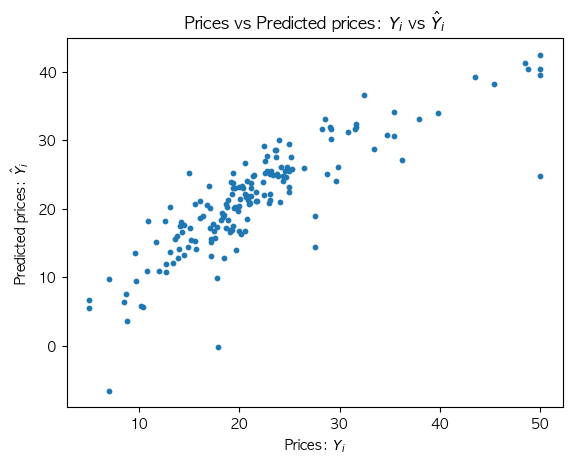

In [27]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [28]:
lr_ne.coef_

array([-1.28749718e-01,  3.78232228e-02,  5.82109233e-02,  3.23866812e+00,
       -1.61698120e+01,  3.90205116e+00, -1.28507825e-02, -1.42222430e+00,
        2.34853915e-01, -8.21331947e-03, -9.28722459e-01,  1.17695921e-02,
       -5.47566338e-01])

## Linear Regression with SGD

In [36]:
from sklearn.linear_model import SGDRegressor
lr_SGD = SGDRegressor()

In [37]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [41]:
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [42]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [43]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(99303210211581.05, 9.861127558325454e+27)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

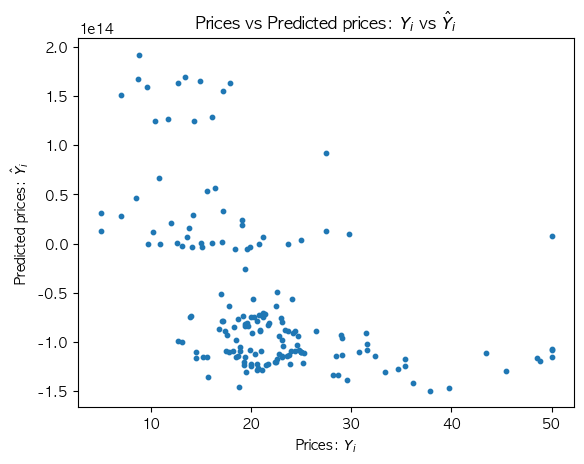

In [44]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

발산됐음, 그러므로 스케일된 데이터를 활용해야 한다.

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42)

In [46]:
lr_SGD.fit(X_train, y_train)
y_hat = lr_SGD.predict(X_test)
y_true = y_test